#                            Exploring the Titanic Dataset

We'll start off by loading the required base libraries for the project. These are the only ones we need to manipulate and visualize our data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,9)




We'll also be needing several libraries that contain various classifier models.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Loading and Viewing the Training and Test Data.

In [3]:
data=pd.read_csv("train.csv")

In [4]:
titanic_df=pd.DataFrame(data)


In [5]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As we can see, we've the following 12 columns: 
* PassengerID : the unique id of the individual passengers
*   Survived: survival information, 0 indicate failure   (death) while 1 indicates success(survival)
*   Pclass: The class in which the passengers were travelling.
*   Name: Name of the passengers.
*   Sex: Passengers' gender.
*   Age: Passengers' Age.
*   Parch: Number of parents/gaurdians abord the titanic for each passenger.
*   SibSB: Number of siblings aboard the titanic for each passenger.
*   Ticket: ticket number of each passenger.
*   Fare: Fare that each passenger paid for the voyage.
*   Cabin: Cabin number where each passenger stayed.
*   Embarked: The city from which each passenger embarked upon the titanic.

The Survived Column is obviously our label i.e. this is what we have to predict, and it is thus missing from the test set.

As for the other columns, categorizing them would help us better understand and decide upon the features.

The following are the categories and the labels that fit in those categories:

   * Categorical: Sex and Embarked.
   * Ordinal: Pclass
   * Numerical:
      1. Continuous: Age and Fare
      2. Discreet: SibSp and Parch
   * Alphanumerical: Ticket







#                      More Details about the Dataset  

Checking for null values

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


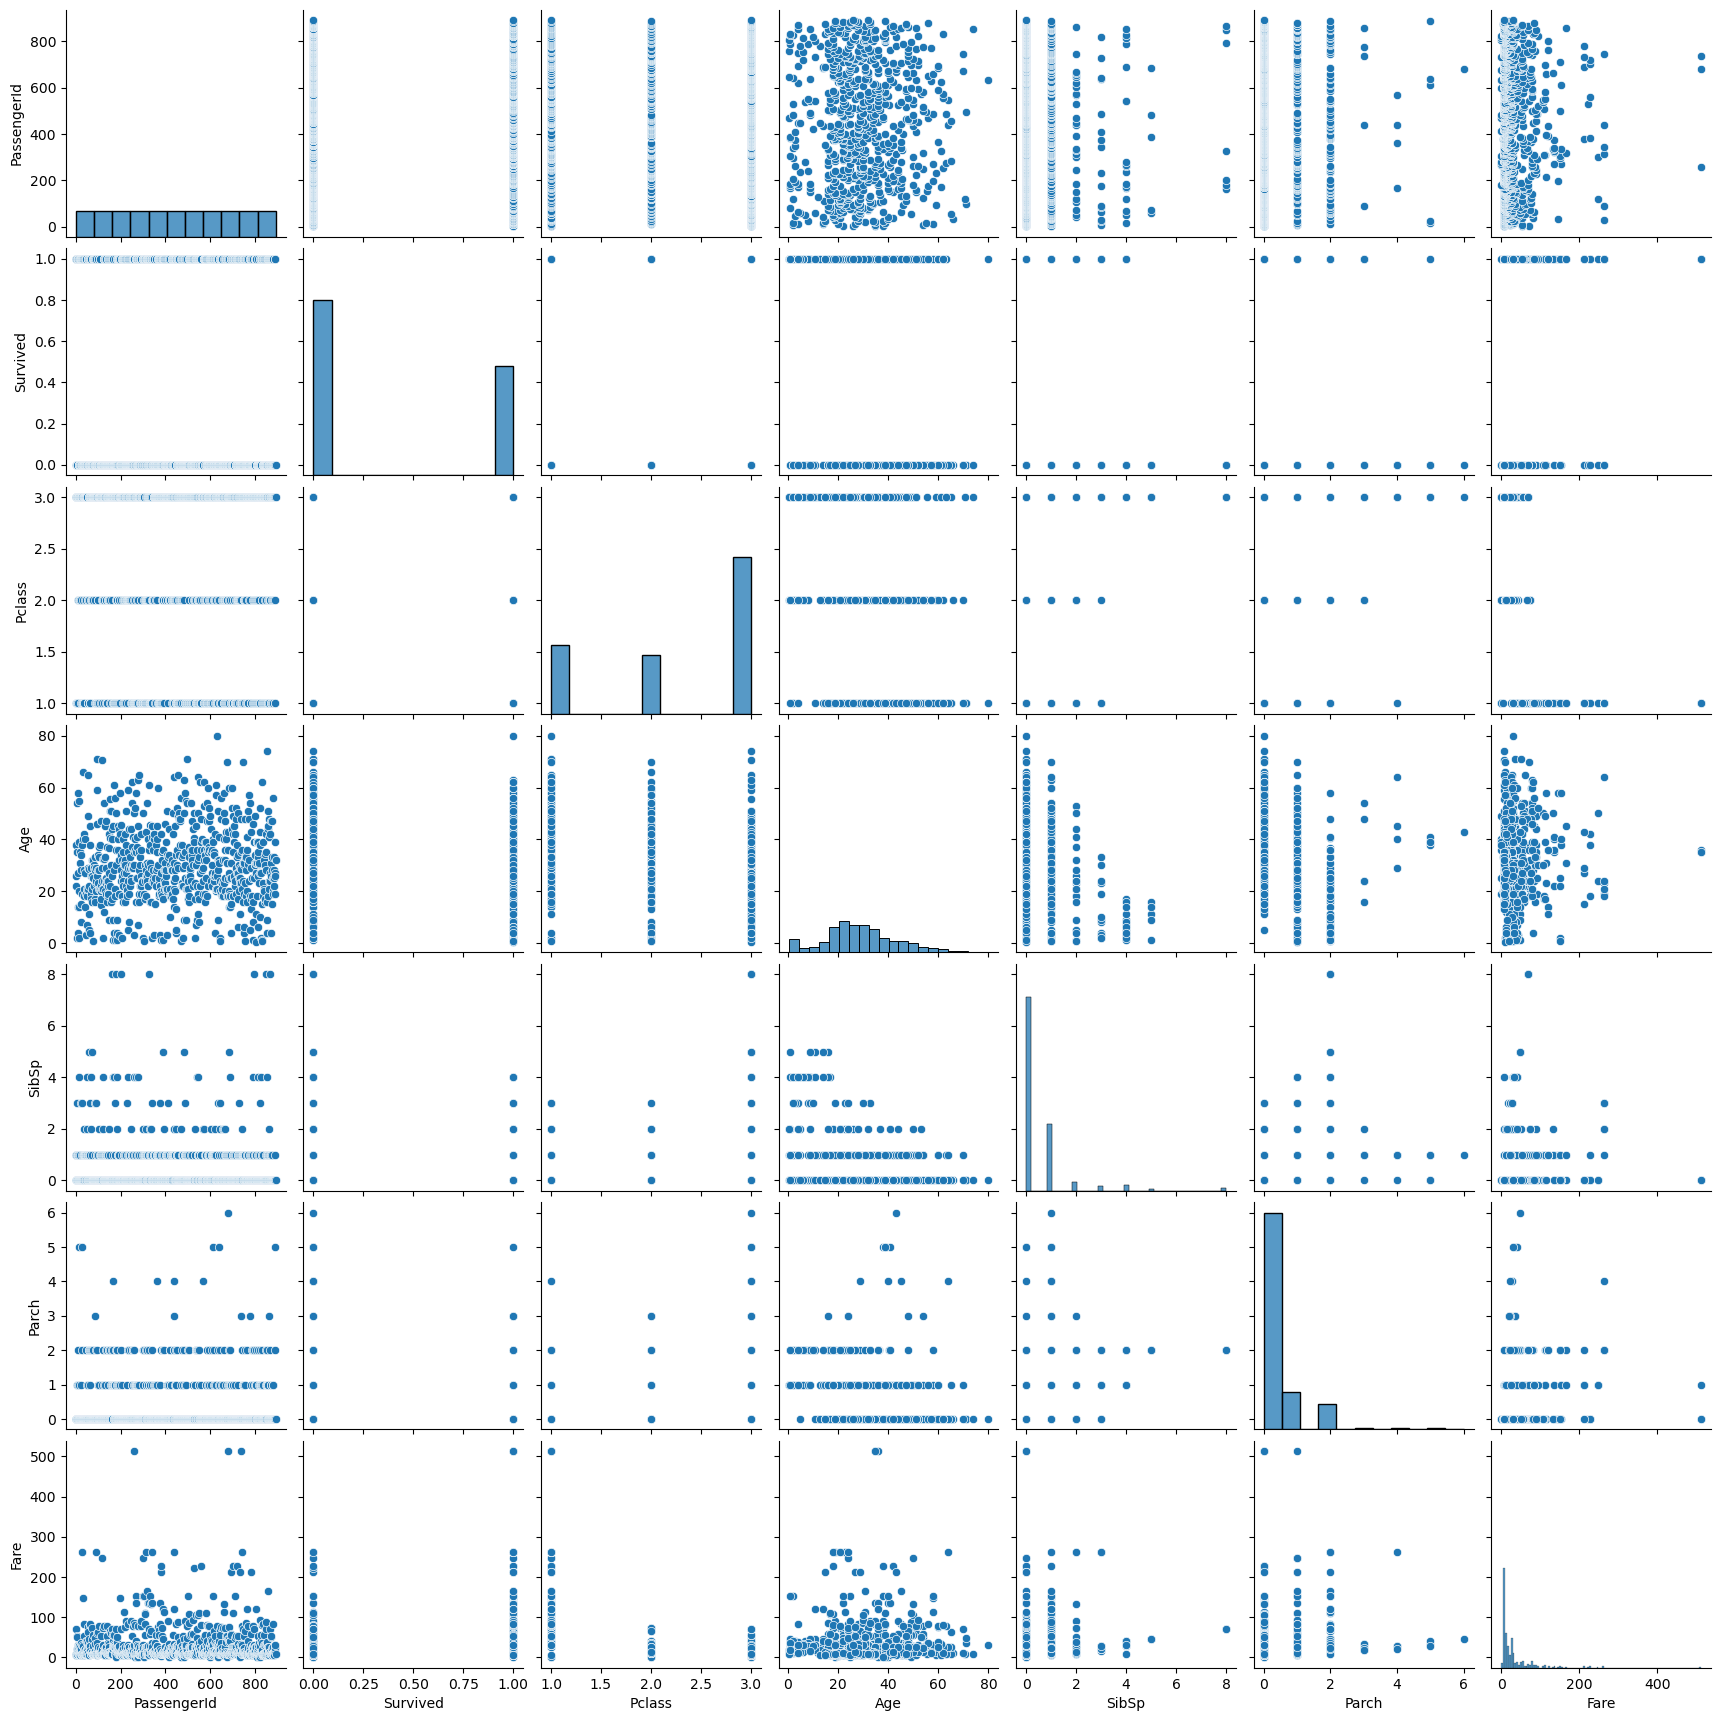

In [8]:
sns.pairplot(titanic_df)

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the above table, we can observe:

* There are a total of 891 values in each column of the dataset.
* The survival rate among these 891 passengers is around 38%, in comparison to the factual 32% survival rate of the incident reports.
* Nearly 30% of the passengers had siblings aboard.
Fare variation is low, with the exception of some person paying a relatively large amount of 512 dollars. There are some  outliers.
* The mean age of the passengers is 29 years with a standard deviation of 14. Nearly 75% of the passengers are under 38 years of age. A few outliers exist(above 80 years).
* Most of the passengers(nearly 75%) did not travel with parents/gaurdians.





# Preprocessing


Using the above observations, we can do the following from the get-go:

*  Drop the Name since they're not features(we could do 
something with them but lets keep this one simple).
*  Drop Cabin because of its high null value count.
*  Drop Ticket because of its low unique value count.
*  Additionally, drop PassengerId from the training data.

In [11]:
titanic_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


## Combining the SibSp and Parch Features
Since we observed earlier that there was no correlation among these 2 features, we can combine them to create a stronger feature. Let's call it familysize

In [12]:
titanic_df["familysize"]=titanic_df["SibSp"]+titanic_df["Parch"]


In [13]:
titanic_df[['familysize', 'Survived']].groupby(['familysize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,familysize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


Let's combine these features into a categorical one called IsAlone. If that has better correlation with survival, we'll drop all three FamilySize SibSp, and Parch in favor of IsAlone. Otherwise we would keep FamilySize and drop the other two.


In [14]:
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['familysize'] == 1, 'IsAlone'] = 1
titanic_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
1,1,0.552795
0,0,0.346575


Thus, we drop the previous three columns and obtain a better feature.

In [15]:
titanic_df.drop(['SibSp', 'Parch', 'familysize'], axis = 1, inplace = True)

In [16]:
titanic_df

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0
887,1,1,female,19.0,30.0000,S,0
888,0,3,female,NaN,23.4500,S,0
889,1,1,male,26.0,30.0000,C,0


Now,filling the missing values in Age column

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

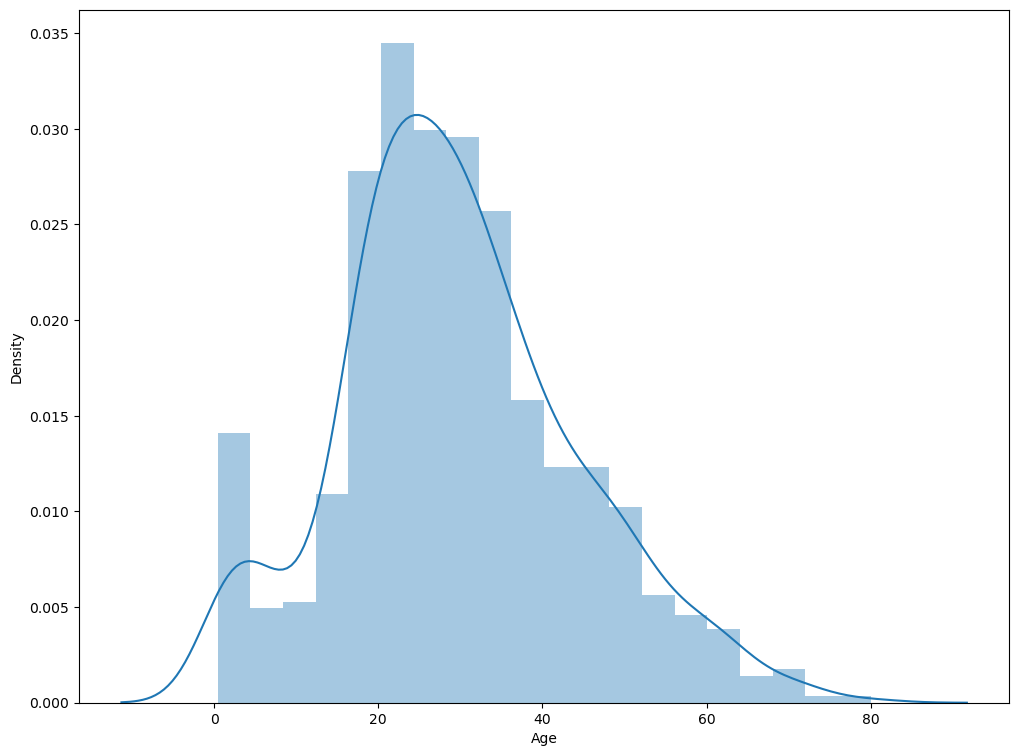

In [17]:
sns.distplot(titanic_df['Age'])

In [18]:
def filling_missing():
    global titanic_df
    for pclass in [1,2,3]:
      for sex in ['male','female']:
        for survived in [1,0]:
            k=titanic_df["Age"][(titanic_df.Pclass==pclass) & (titanic_df.Age.isnull() ) & (titanic_df.Sex==sex) & (titanic_df.Survived==survived)].index.tolist()
            
            y=titanic_df["Age"][(titanic_df.Pclass==pclass) & (~titanic_df.Age.isnull() ) & (titanic_df.Sex==sex) & (titanic_df.Survived==survived)].mean()
    
            for i in k:
                titanic_df.at[i,"Age"]=int(y)
    null_index=titanic_df[titanic_df.Embarked.isnull()].index.tolist()
    
    for i in null_index:
      titanic_df.at[i,"Embarked"]="C"
  
filling_missing()

In [19]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

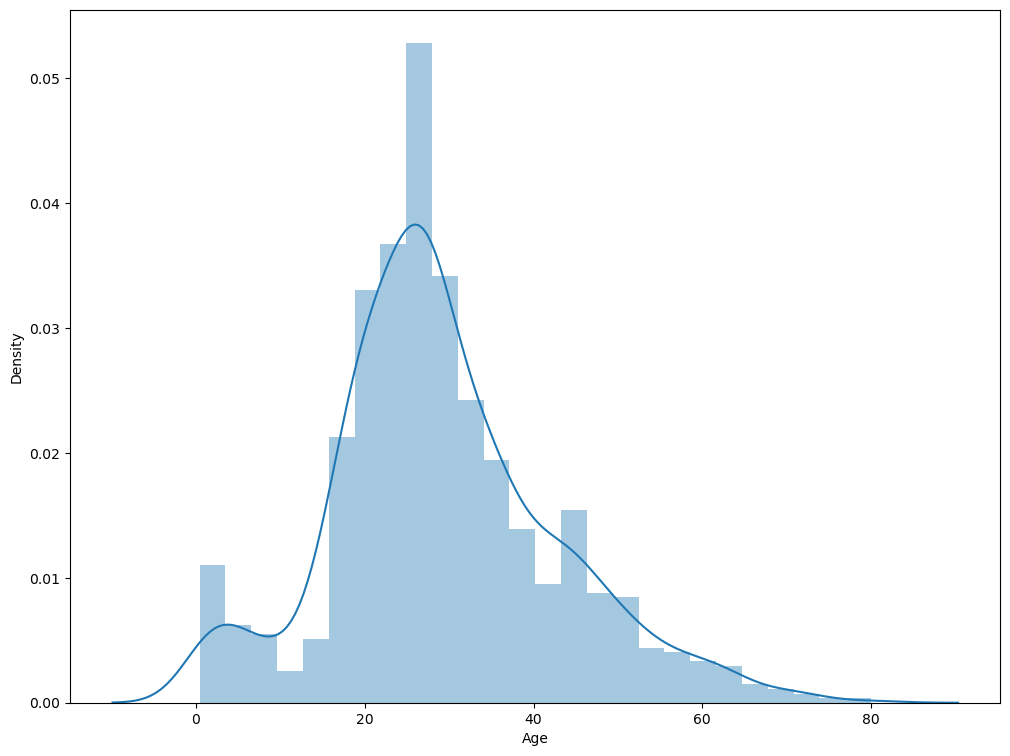

In [20]:
sns.distplot(titanic_df['Age'])

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

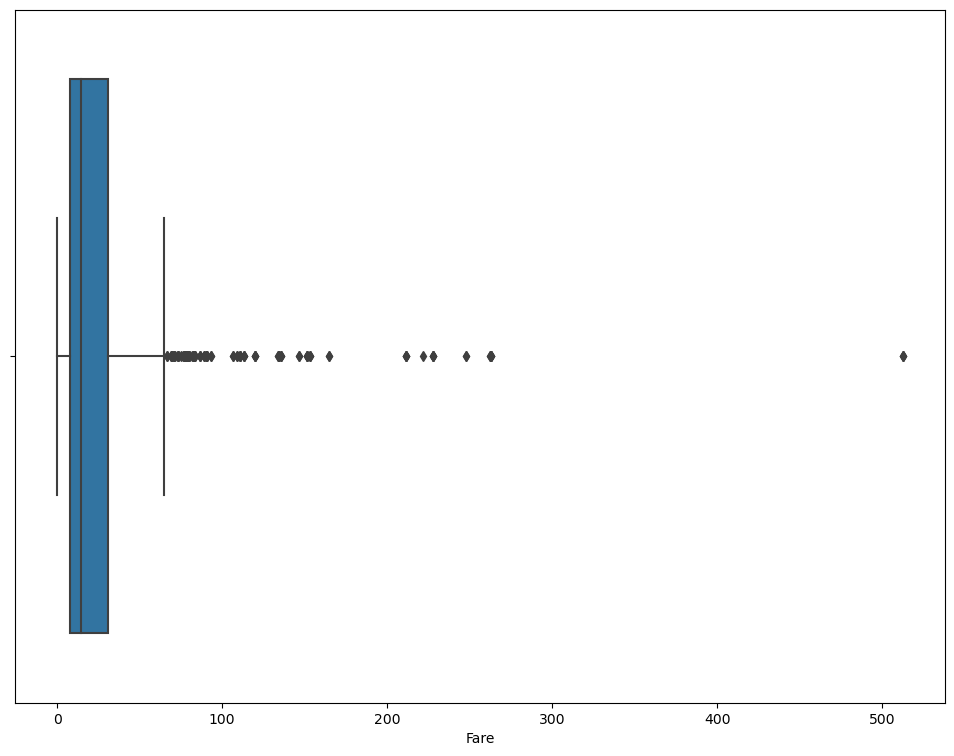

In [21]:
sns.boxplot(titanic_df.Fare)

As there are some passengers who gave more than others for the ticket .So, converting it into categorical column 

In [22]:

titanic_df['FareRange'] = pd.qcut(titanic_df['Fare'], 4)
titanic_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [23]:
titanic_df.loc[titanic_df['Fare'] <= 7.91, 'Fare'] = 0.0
titanic_df.loc[(titanic_df['Fare'] > 7.91) & (titanic_df['Fare'] <= 14.454), 'Fare'] = 1.0
titanic_df.loc[(titanic_df['Fare'] > 14.454) & (titanic_df['Fare'] <= 31.0), 'Fare']   = 2.0
titanic_df.loc[titanic_df['Fare'] > 31.0, 'Fare'] = 3.0
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
titanic_df.drop(['FareRange'], axis=1, inplace = True)

In [24]:
titanic_df

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,0,S,1
1,1,1,female,38.0,3,C,1
2,1,3,female,26.0,1,S,0
3,1,1,female,35.0,3,S,1
4,0,3,male,35.0,1,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,1,S,0
887,1,1,female,19.0,2,S,0
888,0,3,female,23.0,2,S,0
889,1,1,male,26.0,2,C,0


# Data Visualisation
Now, data is ready for plotting the graphs and visuaisation 

In [25]:
titanic_df.groupby("Sex").count()

,Survived,Pclass,Age,Fare,Embarked,IsAlone
Sex,,,,,,
female,314,314,314,314,314,314
male,577,577,577,577,577,577


C:\Users\gauta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

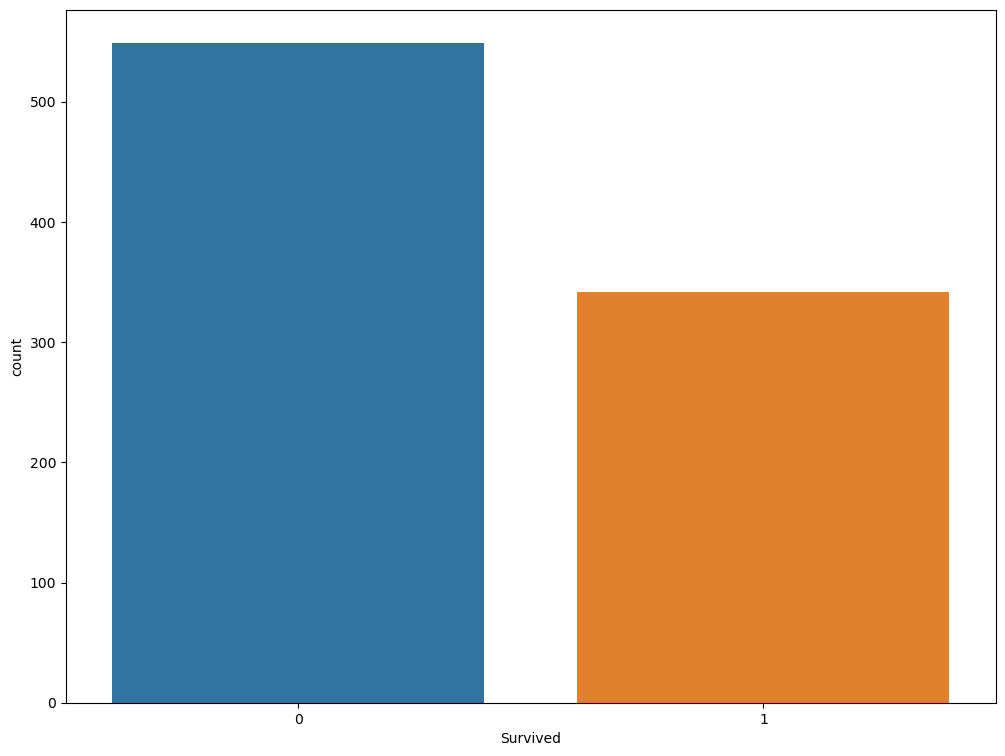

In [26]:
print(titanic_df["Survived"].value_counts())
sns.countplot(titanic_df["Survived"])

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\gauta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


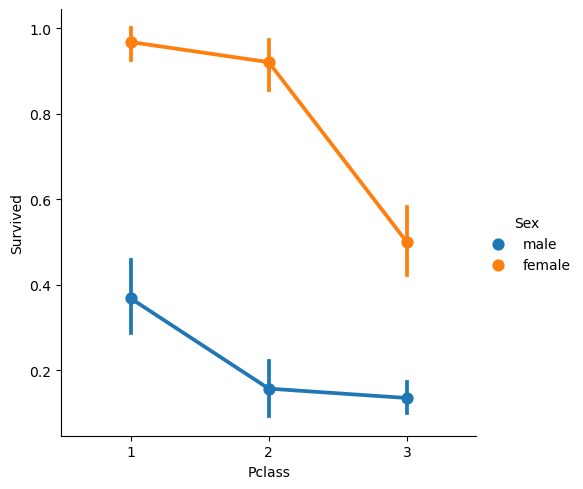

In [27]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_df)

In [28]:
pd.crosstab([titanic_df.Sex,titanic_df.Survived],titanic_df.Pclass)

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

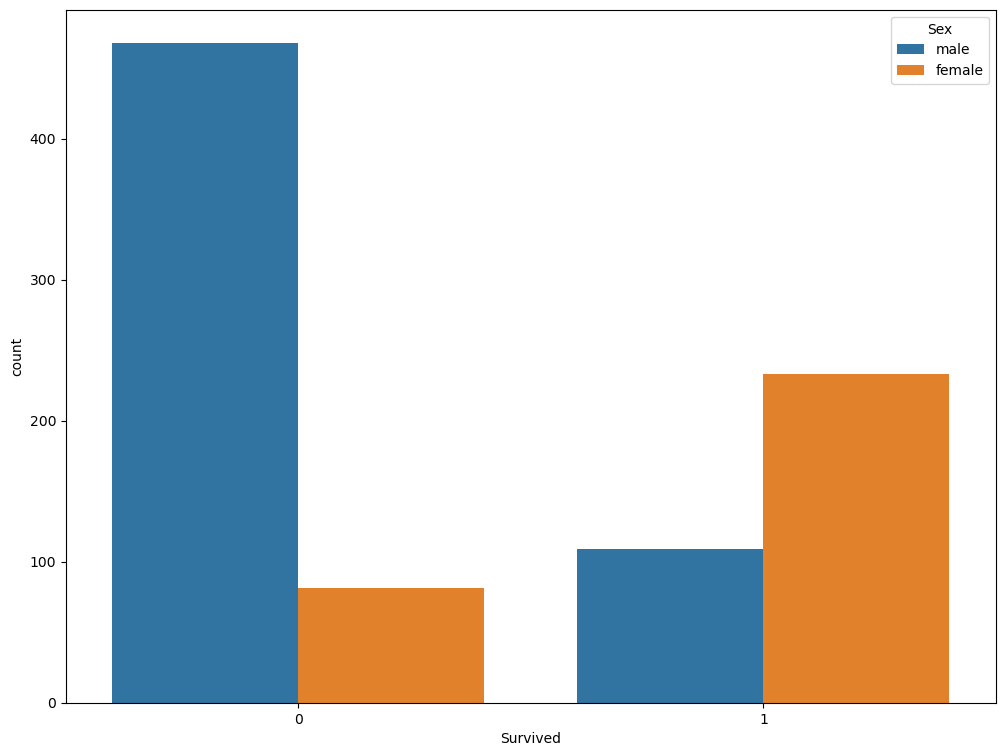

In [29]:
sns.countplot(titanic_df.Survived,hue=titanic_df.Sex)
titanic_df.groupby("Sex")["Survived"].value_counts()

<AxesSubplot:ylabel='Sex'>

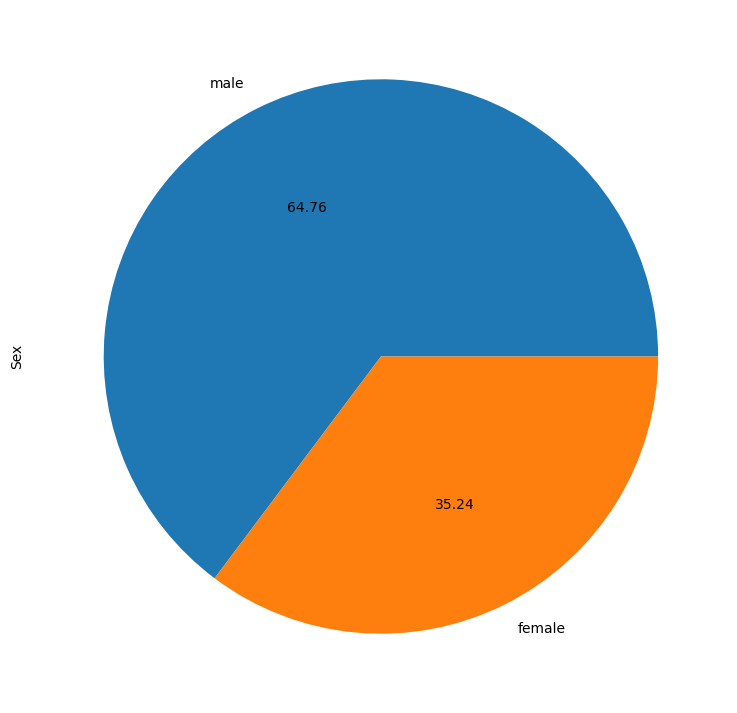

In [30]:
titanic_df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

In [31]:
pd.crosstab([titanic_df.Pclass,titanic_df.Survived],titanic_df.Sex)

Sex              female  male
Pclass Survived              
1      0              3    77
       1             91    45
2      0              6    91
       1             70    17
3      0             72   300
       1             72    47

In [32]:
pd.crosstab([titanic_df.Embarked,titanic_df.Survived,titanic_df.Pclass],titanic_df.Sex)

Sex                       female  male
Embarked Survived Pclass              
C        0        1            1    25
                  2            0     8
                  3            8    33
         1        1           44    17
                  2            7     2
                  3           15    10
Q        0        1            0     1
                  2            0     1
                  3            9    36
         1        1            1     0
                  2            2     0
                  3           24     3
S        0        1            2    51
                  2            6    82
                  3           55   231
         1        1           46    28
                  2           61    15
                  3           33    34

In [33]:
titanic_df.pivot_table(index=['Pclass','Survived'],columns='Sex')["Age"]

Sex                 female       male
Pclass Survived                      
1      0         25.666667  44.461039
       1         34.846154  36.220444
2      0         36.000000  33.340659
       1         28.078571  16.019412
3      0         23.625000  27.183333
       1         19.215278  22.221702

In [34]:
(titanic_df.groupby(['Sex','Pclass']).mean()['Survived']*100)

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

<AxesSubplot:ylabel='Survived'>

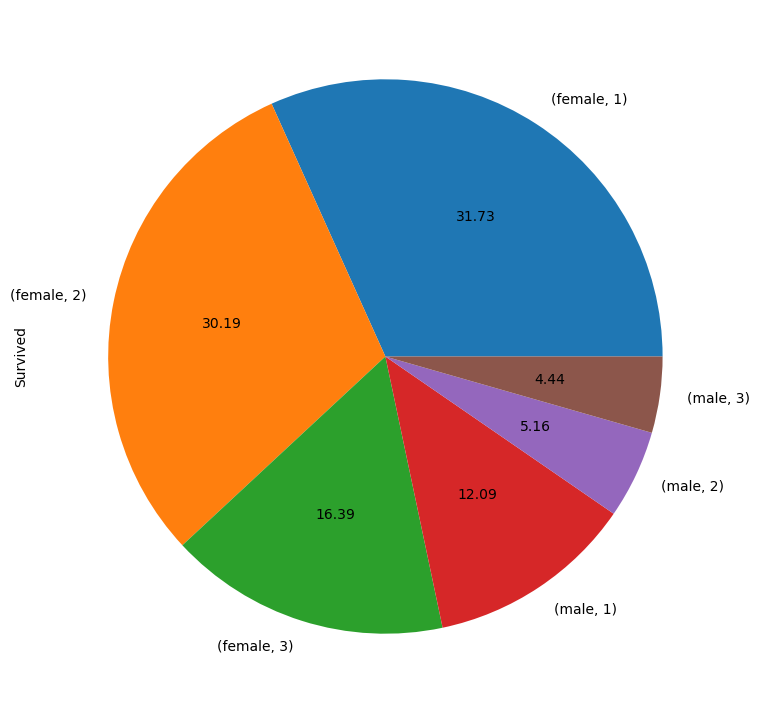

In [35]:
(titanic_df.groupby(['Sex','Pclass']).mean()['Survived']*100).plot(kind='pie',autopct='%.2f')

In [36]:
titanic_df[(titanic_df.Sex=='female') & (titanic_df.Pclass==1)].mean()

C:\Users\gauta\AppData\Local\Temp\ipykernel_23460\556173813.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_df[(titanic_df.Sex=='female') & (titanic_df.Pclass==1)].mean()


Survived     0.968085
Pclass       1.000000
Age         34.553191
Fare         2.914894
IsAlone      0.414894
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

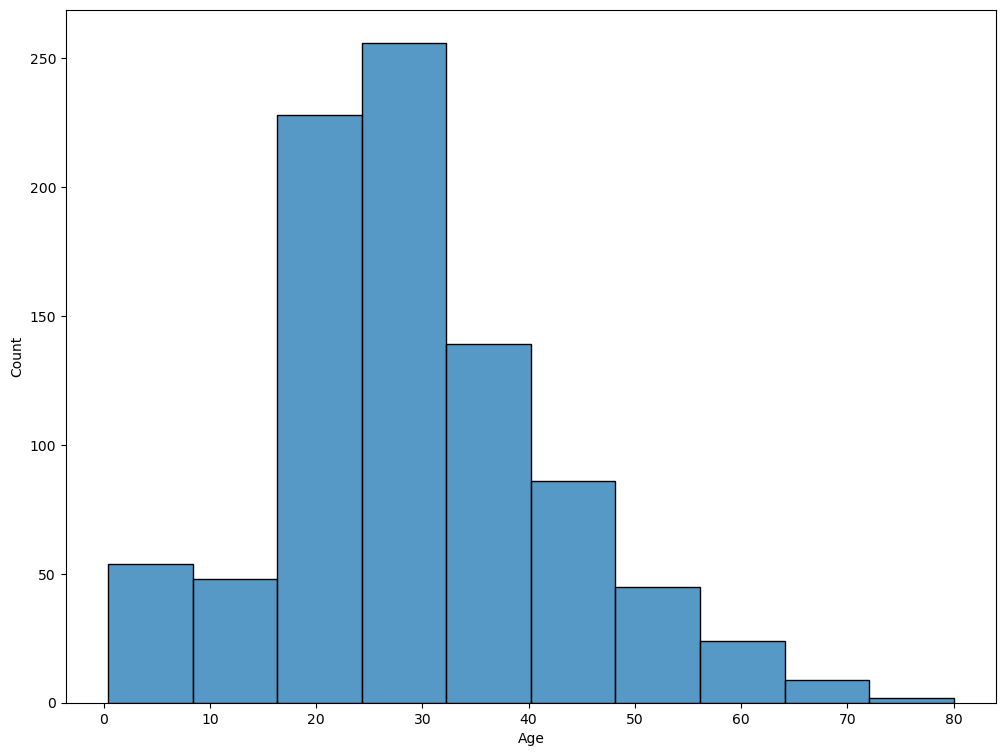

In [37]:
sns.histplot(titanic_df.Age,bins=10)

<AxesSubplot:xlabel='Pclass', ylabel='Embarked'>

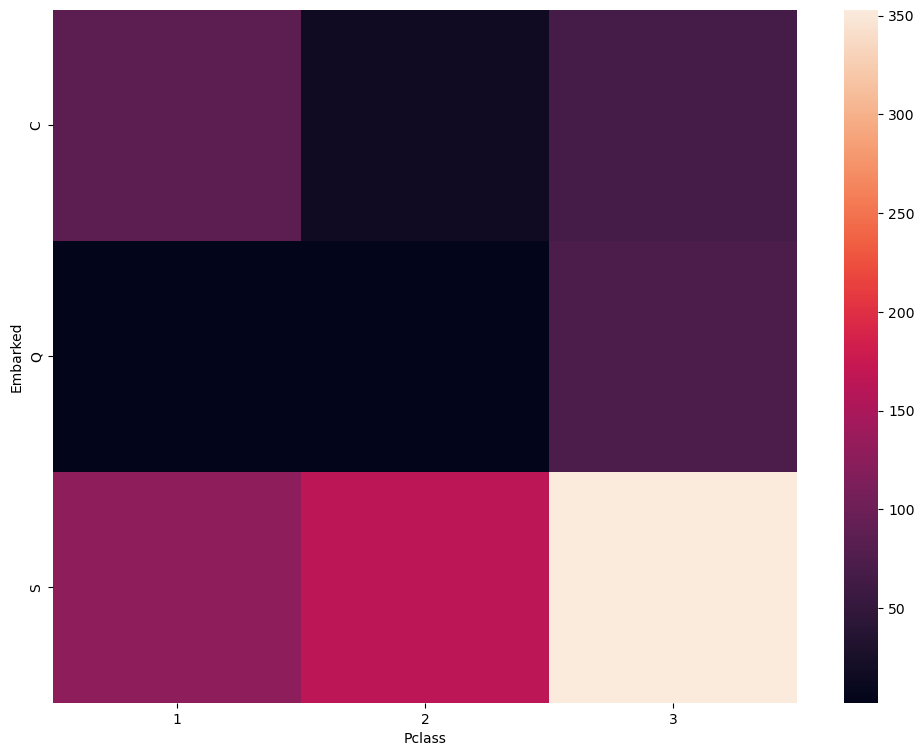

In [38]:
sns.heatmap(pd.crosstab(titanic_df.Embarked,titanic_df.Pclass))

C:\Users\gauta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

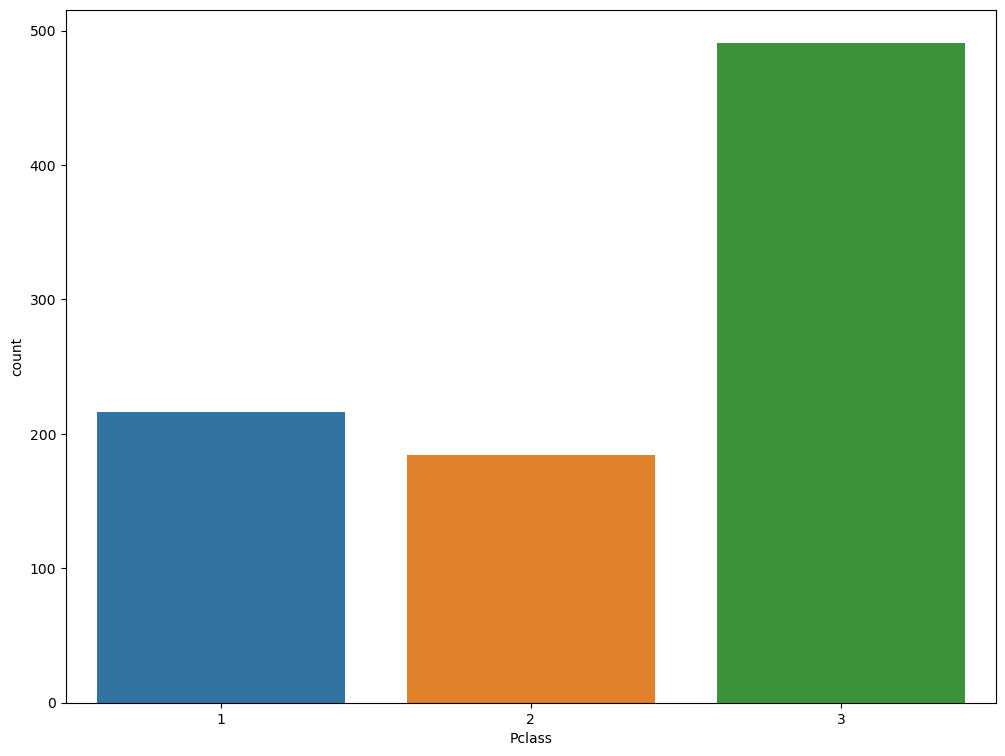

In [39]:
sns.countplot(titanic_df['Pclass'])

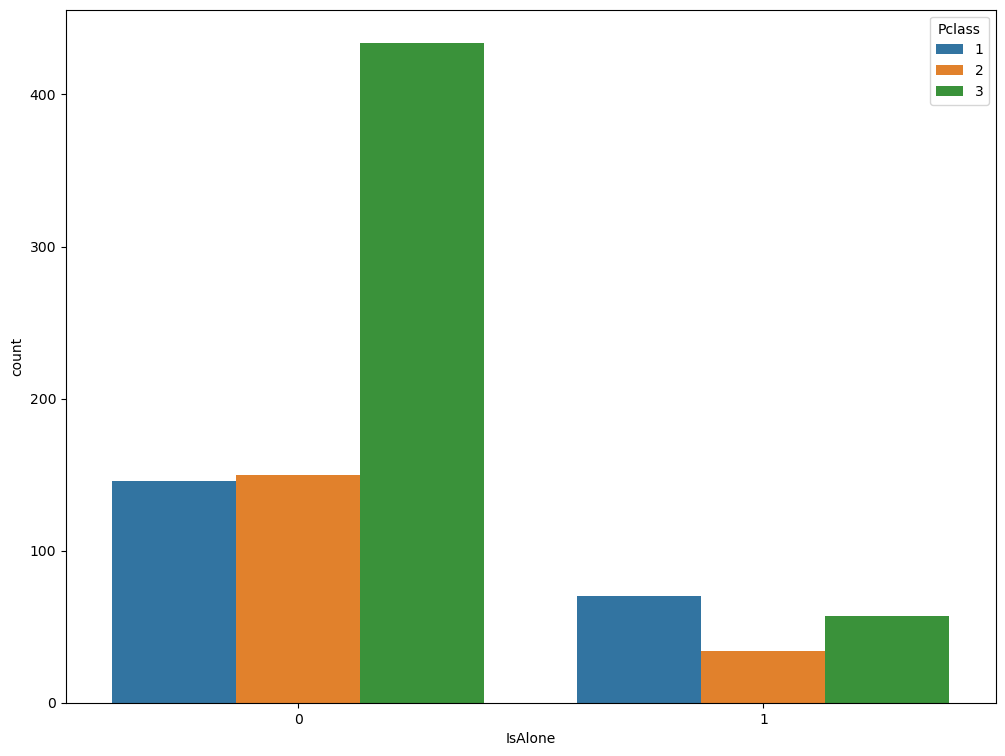

In [40]:
sns.countplot(x='IsAlone', hue='Pclass', data=titanic_df);

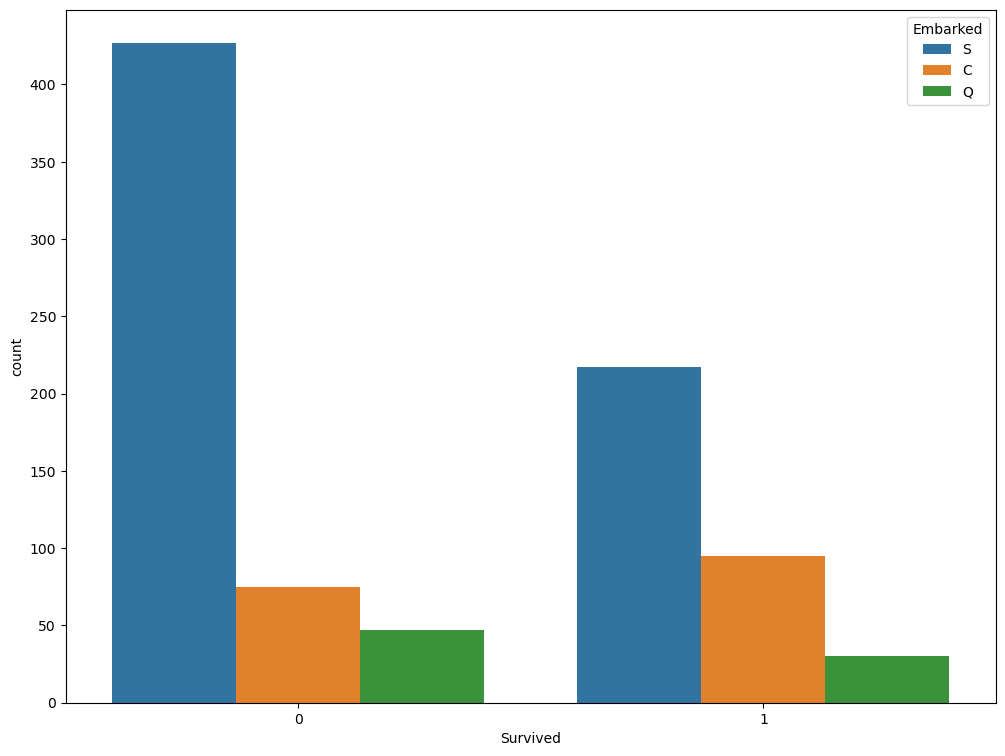

In [41]:
sns.countplot(x='Survived', hue='Embarked', data=titanic_df);

In [42]:
titanic_df

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,0,S,1
1,1,1,female,38.0,3,C,1
2,1,3,female,26.0,1,S,0
3,1,1,female,35.0,3,S,1
4,0,3,male,35.0,1,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,1,S,0
887,1,1,female,19.0,2,S,0
888,0,3,female,23.0,2,S,0
889,1,1,male,26.0,2,C,0


# Modelling
Now we're completely ready to train different machine learning models and test their scores but before that I want to do One Hot Encoding on 'Sex' and 'Embarked' columns.
One thing to note here is that while training different models, we may observe that some models perform better than others. This, however, is never universal, rather always varies depending on the dataset, what data wrangling we've done, among other things.

Below is the list of classifiers we'll be feeding our training data to :

But first, let's split our data into training and test data.



In [43]:
titanic_df=pd.get_dummies(titanic_df,columns=['Embarked','Sex'],drop_first=True)

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
x_train,x_test,y_train,y_test=train_test_split(titanic_df.drop(["Survived"],axis=1),
                                               titanic_df["Survived"],test_size=0.40,
                                               random_state=50)

In [46]:
x_train.shape

(534, 7)

In [47]:
x_test.shape

(357, 7)

# Pipelining the training process.
Although it is usually sufficient to import the neccessary model training and preprocessing libraries and then test each one independently, we can make our tasks much easier by pipelining the steps for our final model prediction.

Thus, we create a scaler object from sklearns preprocessing module as well as a classifier object for each of the imported machine learning classifiers, namely:

* Stochastic Gradient Descent: The most basic perceptron with a custom learning rule and a cost func.
* Logistic Regression: An improvement upon the SGD in terms of regularization ability.
* The Support Vector Machine: We're the using the rbf kernel with a pretty high inverse sigma for better results in this case.
* Linear SVC: A linear version of the Support Vector Machine.
* K-nearest Neighbors: with k = 3.
* And a default decision tree and Random Forest Object.

We then put each of them in an iterable list.




In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sgd = SGDClassifier()
log_reg = LogisticRegression(solver = 'liblinear')
svc = SVC(kernel = 'rbf', C = 10.0)
linear_svc = LinearSVC()
knn_3 = KNeighborsClassifier(n_neighbors = 3)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

clf_list = [sgd, log_reg, svc, linear_svc, knn_3, decision_tree, random_forest]

#clf_names = ["Stochastic Gradient Descent", "Logistic Regression", "SVM", "Linear SVC", "K-Nearest-Neighbours(n = 3)", "Decision Tree", "Random Forest

In [49]:
clf_list

[SGDClassifier(),
 LogisticRegression(solver='liblinear'),
 SVC(C=10.0),
 LinearSVC(),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

# Accuracy Testing with the training set.
For each classifer in clf_list, we build a pipeline that does the following:

1. Scales the training data.
2. Fits the scaled training data to the particular classifier model for wieght training.
3. Predicts and prints the average accuracy score as compared to the known target values.

In [50]:
from sklearn.pipeline import Pipeline
print("Accurary Scores tested against the training data's target values:")
for classifier in clf_list:
    pipeline = Pipeline([('sclaer', scaler), ('clf', classifier)])
    pipeline.fit(x_train, y_train)
    y_predict = pipeline.predict(x_train)
    print("{} : {}".format(type(classifier).__name__, ((y_predict == y_train)).sum() / y_predict.shape[0] * 100))

Accurary Scores tested against the training data's target values:
SGDClassifier : 78.83895131086143
LogisticRegression : 80.71161048689139
SVC : 86.70411985018727
LinearSVC : 79.40074906367042
KNeighborsClassifier : 87.82771535580525
DecisionTreeClassifier : 97.00374531835206
RandomForestClassifier : 97.00374531835206


C:\Users\gauta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


###  Although we used only 'train.csv' and did train test split and divided the 'train.csv' dataset into training and testing, What you can do is , you can use 'test.csv' for testing and 'train.csv' for training and process will remain same ,might the accuracy result will change.